# Dataclustering

In diesem Notebook wurde erprobt, wie es möglich ist die Bilder des Datensatzes in ein zweidimensionales Koordinatenkreuz zu clustern.

Vorbilder für dieses Notebook waren folgende Tutorials und Websites:  
[Image clustering by its similarity in python](https://stackoverflow.com/questions/39123421/image-clustering-by-its-similarity-in-python)  
[How to cluster images based on visual similarity](https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34)  
[Using Keras' Pre-trained Models for Feature Extraction in Image Clustering](https://medium.com/@franky07724_57962/using-keras-pre-trained-models-for-feature-extraction-in-image-clustering-a142c6cdf5b1)  
[Visualize Image Clustering](https://medium.com/@franky07724_57962/visualize-image-clustering-fcd0dde89408)  
[How to Plot K-Means Clusters with Python?](https://www.askpython.com/python/examples/plot-k-means-clusters-python)


In [1]:
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from sklearn.cluster import KMeans
import numpy as np
import os, path

In [2]:
model = ResNet50(weights="imagenet", include_top=False)
model.summary()

n[0][0]          
__________________________________________________________________________________________________
conv3_block4_out (Activation)   (None, None, None, 5 0           conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_conv (Conv2D)    (None, None, None, 2 131328      conv3_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, None, None, 2 1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, None, None, 2 0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, None, None, 2 590080      conv4_block1_1_relu[0][0] 

In [3]:
img_path = "E:\PowerFolders\Masterarbeit\Bilder\\1_Datensaetze\\first_annotation_dataset\\acht1_036.jpg"
img = image.load_img(img_path, target_size=(224,244))

In [4]:
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

In [5]:
resnet_feature = model.predict(img_data)
print(resnet_feature.shape)

(1, 7, 8, 2048)


In [6]:
resnet_feature_list = []

filenames = [image for image in os.listdir("E:\PowerFolders\Masterarbeit\Bilder\\1_Datensaetze\\first_annotation_dataset") if image.endswith(".jpg")]

# for i, file_name in enumerate(filenames)
print(filenames)
print(len(filenames))

['acht1_036.jpg', 'acht1_067.jpg', 'acht1_100.jpg', 'acht1_158.jpg', 'acht2_024.jpg', 'acht2_085.jpg', 'acht2_140.jpg', 'acht2_153.jpg', 'acht2_242.jpg', 'acht5_030.jpg']
10


In [7]:
path = "E:\PowerFolders\Masterarbeit\Bilder\\1_Datensaetze\\first_annotation_dataset\\"
for i, file_name in enumerate(filenames):
    img = image.load_img(path + file_name, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    resnet_freature = model.predict(img_data)
    resnet_freature_np = np.array(resnet_freature)
    resnet_feature_list.append(resnet_freature_np.flatten())

resnet_feature_list_np = np.array(resnet_feature_list)
kmeans = KMeans(n_clusters=2, random_state=0).fit(resnet_feature_list_np)

In [8]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 1]


In [8]:
import matplotlib as plt

# [How to cluster images based on visual similarity](https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34)

In [2]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, VGG16

from keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import os, pickle
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd


In [3]:
path = "E:\PowerFolders\Masterarbeit\Bilder\\1_Datensaetze\\first_annotation_dataset\\"
filenames = [image for image in os.listdir(path) if image.endswith(".jpg")]

In [4]:
image = load_img(path + filenames[0], target_size=(224,224))
image = np.array(image)

print(image.shape)

(224, 224, 3)


In [5]:
reshape_image = image.reshape(1, 224, 224, 3)
print(reshape_image.shape)

(1, 224, 224, 3)


In [6]:
data = preprocess_input(reshape_image)

In [7]:
model = VGG16()

model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [8]:
feature = model.predict(data)
print(feature.shape)

(1, 4096)


In [9]:
def extract_features(file, model):
    image = load_img(file, target_size=(224, 224))
    image = np.array(image)
    reshaped_image = image.reshape(1, 224, 224, 3)
    image_data = preprocess_input(reshaped_image)
    feature = model.predict(image_data, use_multiprocessing=True)
    return feature

In [10]:
feature_list = {}
for name in filenames:
    feature = extract_features(path + name, model)
    feature_list[name] = feature

In [11]:
features = np.array(list(feature_list.values()))
print(features.shape)

(10, 1, 4096)


In [12]:
features = features.reshape(-1, 4096)
print(features.shape)

(10, 4096)


In [13]:
pca = PCA(n_components=2, random_state=22)
pca.fit(features)

transformed_features = pca.transform(features)

print(transformed_features.shape)

(10, 2)


In [17]:
kmeans = KMeans(n_clusters=2,n_jobs=-1,random_state=22)
kmeans.fit(transformed_features)
label = kmeans.fit_predict(transformed_features)

In [18]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 1]


In [19]:
print(transformed_features)

[[ -7.3533764 -11.001886 ]
 [ -9.592431   26.767296 ]
 [-17.868286  -37.875137 ]
 [-12.904716   -2.827776 ]
 [ -3.3967025  11.024849 ]
 [ -5.884938  -11.359208 ]
 [-12.108784  -10.480121 ]
 [ -8.417958   42.362453 ]
 [-11.467878   -2.5005102]
 [ 88.99506    -4.1099577]]


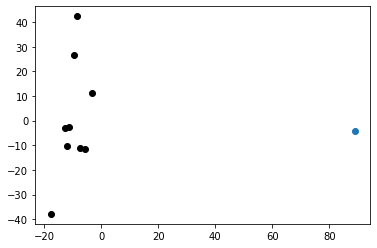

In [21]:
filtered_label0 = transformed_features[label == 0]
filtered_label1 = transformed_features[label == 1]
plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], color = "black")
plt.scatter(filtered_label1[:, 0], filtered_label1[:, 1])
plt.show()